In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.5.0


# Understanding TensorFlow 2.0
---

## Import modules

In [3]:
import tensorflow as tf

## Loading data

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 1s 0us/step


## Defining the structure of the network

In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                                   tf.keras.layers.Dense(128, activation = 'relu'),
                                   tf.keras.layers.Dropout(0.2),
                                   tf.keras.layers.Dense(10, activation = 'softmax')])

## Compiling the Keras model

In [8]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

## Training

In [9]:
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 932us/step - loss: 0.2945 - accuracy: 0.9141
Epoch 2/5
1875/1875 [==============================] - 2s 907us/step - loss: 0.1412 - accuracy: 0.9583
Epoch 3/5
1875/1875 [==============================] - 2s 915us/step - loss: 0.1064 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 2s 904us/step - loss: 0.0872 - accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 2s 941us/step - loss: 0.0749 - accuracy: 0.9766


## Evaluation

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 590us/step - loss: 0.0793 - accuracy: 0.9764


[0.07929537445306778, 0.9764000177383423]

## Implementing Perceptron (OR)

Import modules

In [1]:
import tensorflow as tf
import numpy as np

Defining Perceptron Class using TensorFlow

In [2]:
class Perceptron:
    def __init__(self, w, b):
        self.w = tf.Variable(w, dtype = tf.float32)
        self.b = tf.Variable(b, dtype = tf.float32)
    
    def __call__(self, x):
        return tf.sign(tf.reduce_sum(self.w * x) + self.b)

Utility Function

In [3]:
def v(*args):    # '*': automatically recognized as tuple inputs
    return np.array(args)

Defining a Perceptron

In [4]:
w = v(1, 1) # weights
b = 0.5 # bias

perceptron = Perceptron(w, b)

Checking the activation of Perceptrons

In [5]:
p1 = perceptron(v(1, 1)) # T, T
p2 = perceptron(v(-1, 1)) # F, T
p3 = perceptron(v(-1, -1)) # F, F
p4 = perceptron(v(1, -1)) # T, F

print(p2.numpy(), p1.numpy())
print(p3.numpy(), p4.numpy())

1.0 1.0
-1.0 1.0


## Implementing Perceptron (XOR)

Defining a Perceptron

In [7]:
p_nand = Perceptron(w = v(-1, -1),
                   b = 0.5)

p_or = Perceptron(w = v(1, 1),
                 b = 0.5)

p_and = Perceptron(w = v(1, 1),
                  b = -0.5)

def xor(x):
    h1 = p_nand(x)
    h2 = p_or(x)
    return p_and(v(h1, h2))

Checking the activation of Perceptrons

In [8]:
p1 = xor(v(1, 1))
p2 = xor(v(-1, 1))
p3 = xor(v(-1, -1))
p4 = xor(v(1, -1))

print(p2.numpy(), p1.numpy())
print(p3.numpy(), p4.numpy())

1.0 -1.0
-1.0 1.0


## Gradient Descent Optimization

In [1]:
import numpy as np

Loss Function

In [2]:
def f(x):
    return 0.1 * x**4 - 1.5 * x**3 + 0.6 * x**2 + 1.0 * x + 20.0

Derivatives of the Loss Function

In [8]:
def df_dx(x):
    return 0.4 * x**3 - 4.5 * x**2 + 1.2 * x + 1.0

Hyperparameters

In [4]:
x = 5 # initial x
eps = 1e-5
lr = 0.01 # learning rate
max_epoch = 1000

Implementing Gradient Descent

In [9]:
min_x = x
min_y = f(min_x)
for _ in range(max_epoch):
    grad = df_dx(x)
    new_x = x - lr * grad
    y = f(new_x)
    
    if min_y > y:
        min_x = new_x
        min_y = y
    
    if np.abs(x - new_x) < eps:
        break
    
    x = new_x

In [10]:
print(min_x, min_y)

10.955323272631201 -428.84677390087836


What if start from x = -5?

In [11]:
x = -5 # initial x
eps = 1e-5
lr = 0.01 # learning rate
max_epoch = 1000

In [12]:
min_x = x
min_y = f(min_x)
for _ in range(max_epoch):
    grad = df_dx(x)
    new_x = x - lr * grad
    y = f(new_x)
    
    if min_y > y:
        min_x = new_x
        min_y = y
    
    if np.abs(x - new_x) < eps:
        break
    
    x = new_x

In [13]:
print(min_x, min_y)

-0.35277896788817237 19.789298288581236


Thus, we need to use improved optimizers.

## Visualizing the Results of the Algorithm above

Implementing Gradient Descent

In [18]:
def gradient_descent(initial_x, learning_rate = 0.01, eps = 1e-5, max_epoch = 1000):
    x = initial_x
    
    x_log = [x]
    
    min_x = x
    min_y = f(min_x)
    for _ in range(max_epoch):
        grad = df_dx(x)
        new_x = x - learning_rate * grad
        y = f(new_x)
        
        x_log.append(new_x)
        
        if min_y > y:
            min_x = new_x
            min_y = y
        
        if np.abs(x - new_x) < eps:
            break
        
        x = new_x
    return min_x, min_y, x_log

Visualizing the Results of the Algorithm

In [14]:
import matplotlib.pyplot as plt

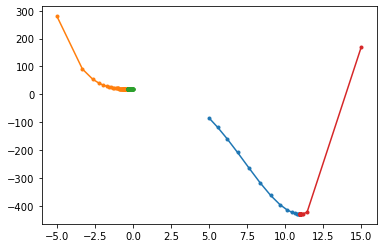

In [26]:
min_x1, min_y1, x_log1 = gradient_descent(initial_x = 5)
min_x2, min_y2, x_log2 = gradient_descent(initial_x = -5)
min_x3, min_y3, x_log3 = gradient_descent(initial_x = 0)
min_x4, min_y4, x_log4 = gradient_descent(initial_x = 15)

y_log1 = f(np.array(x_log1)) # list cannot be used as an input for an operation..
y_log2 = f(np.array(x_log2))
y_log3 = f(np.array(x_log3))
y_log4 = f(np.array(x_log4))


plt.plot(x_log1, y_log1, '.-')
plt.plot(x_log2, y_log2, '.-')
plt.plot(x_log3, y_log3, '.-')
plt.plot(x_log4, y_log4, '.-')
plt.show()

What if the learning_rate is too big?

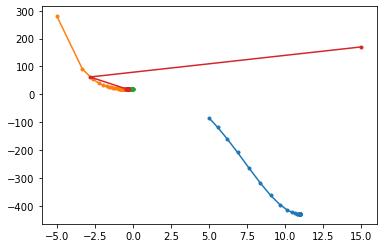

In [28]:
min_x1, min_y1, x_log1 = gradient_descent(initial_x = 5)
min_x2, min_y2, x_log2 = gradient_descent(initial_x = -5)
min_x3, min_y3, x_log3 = gradient_descent(initial_x = 0)
# If the learning rate is too big, then it cannot be converged (overflow).
min_x4, min_y4, x_log4 = gradient_descent(initial_x = 15, learning_rate = 0.05)

y_log1 = f(np.array(x_log1)) # list cannot be used as an input for an operation..
y_log2 = f(np.array(x_log2))
y_log3 = f(np.array(x_log3))
y_log4 = f(np.array(x_log4))


plt.plot(x_log1, y_log1, '.-')
plt.plot(x_log2, y_log2, '.-')
plt.plot(x_log3, y_log3, '.-')
plt.plot(x_log4, y_log4, '.-')
plt.show()

## Numerical Gradient Descent without Back Propagation

In [1]:
import time
import numpy as np

Utility Functions

In [2]:
epsilon = 0.0001

def _t(x):
    return np.transpose(x)

def _m(A, B):
    return np.matmul(A, B)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_errors(h, y):
    return 1 / 2 * np.mean(np.square(h - y))

Dense Layer

In [3]:
class Dense:
    def __init__(self, W, b, a):
        self.W = W
        self.b = b
        self.a = a
        
        # space for storing gradient
        self.dW = np.zeros_like(self.W) # 'zeros_like': generate the same dtype and size as its input
        self.db = np.zeros_like(self.b)
        
    def __call__(self, x):
        return self.a(_m(_t(self.W), x) + self.b)

Deep Neural Network

In [4]:
class DNN:
    def __init__(self, hidden_depth, num_neuron, num_input, num_output, activation = sigmoid):
        def init_var(i, o):
            return np.random.normal(0.0, 0.01, (i, o)), np.zeros((o,))
    
        self.sequence = list()
        # First Hidden Layer
        W, b = init_var(num_input, num_neuron)
        self.sequence.append(Dense(W, b, activation))

        # Hidden Layers
        for _ in range(hidden_depth - 1):
            W, b = init_var(num_neuron, num_neuron)
            self.sequence.append(Dense(W, b, activation))

        # Output Layers
        W, b = init_var(num_neuron, num_output)
        self.sequence.append(Dense(W, b, activation))

    def __call__(self, x):
        for layer in self.sequence:
            x = layer(x)
        return x
    
    def calc_gradient(self, x, y, loss_func):
        def get_new_sequence(layer_index, new_layer):
            new_sequence = list()
            for i, layer in enumerate(self.sequence):
                if i == layer_index:
                    new_sequence.append(new_layer)
                else:
                    new_sequence.append(layer)
            return new_sequence
        
        def eval_sequence(x, sequence):
            for layer in sequence:
                x = layer(x)
            return x
        
        loss = loss_func(self(x), y)
        
        for layer_id, layer in enumerate(self.sequence):
            for w_i, w in enumerate(layer.W): # for each row
                for w_j, ww in enumerate(w): # for each column
                    W = np.copy(layer.W)
                    W[w_i][w_j] = ww + epsilon
                    new_layer = Dense(W, layer.b, layer.a)
                    new_seq = get_new_sequence(layer_id, new_layer)
                    h = eval_sequence(x, new_seq)
                    
                    # numerical gradient: (f(x + epsilon) - f(x)) / epsilon
                    num_grad = (loss_func(h, y) - loss) / epsilon
                    layer.dW[w_i][w_j] = num_grad
                    
            for b_i, bb in enumerate(layer.b):
                b = np.copy(layer.b)
                b[b_i] = bb + epsilon
                new_layer = Dense(layer.W, b, layer.a)
                new_seq = get_new_sequence(layer_id, new_layer)
                h = eval_sequence(x, new_seq)
                
                num_grad = (loss_func(h, y) - loss) / epsilon
                layer.db[b_i] = num_grad
        
        return loss

Gradient Descent

In [5]:
def gradient_descent(network, x, y, loss_obj, alpha = 0.01):
    loss = network.calc_gradient(x, y, loss_obj)
    for layer in network.sequence:
        layer.W += -alpha * layer.dW
        layer.b += -alpha * layer.db
    return loss       

Test Running

In [6]:
x = np.random.normal(0.0, 1.0, (10,))
y = np.random.normal(0.0, 1.0, (2,))

dnn = DNN(hidden_depth = 5, num_neuron = 32, num_input = 10,
          num_output = 2, activation = sigmoid)

t = time.time()
for epoch in range(100):
    loss = gradient_descent(dnn, x, y, mean_squared_errors, 0.01)
    print(f'Epoch {epoch + 1}: Test Loss {loss}')
print(f'{time.time() - t} seconds elapsed.')

Epoch 0: Test Loss 0.8953062658720929
Epoch 1: Test Loss 0.8902873133520907
Epoch 2: Test Loss 0.885293948236327
Epoch 3: Test Loss 0.8803278159311777
Epoch 4: Test Loss 0.8753905104496811
Epoch 5: Test Loss 0.8704835717373229
Epoch 6: Test Loss 0.8656084832578721
Epoch 7: Test Loss 0.8607666698439795
Epoch 8: Test Loss 0.8559594958170391
Epoch 9: Test Loss 0.85118826337844
Epoch 10: Test Loss 0.8464542112695442
Epoch 11: Test Loss 0.8417585137007958
Epoch 12: Test Loss 0.8371022795428794
Epoch 13: Test Loss 0.8324865517759686
Epoch 14: Test Loss 0.827912307188103
Epoch 15: Test Loss 0.8233804563146759
Epoch 16: Test Loss 0.8188918436073155
Epoch 17: Test Loss 0.8144472478225736
Epoch 18: Test Loss 0.8100473826166076
Epoch 19: Test Loss 0.8056928973336157
Epoch 20: Test Loss 0.8013843779740845
Epoch 21: Test Loss 0.7971223483288334
Epoch 22: Test Loss 0.7929072712647641
Epoch 23: Test Loss 0.7887395501473976
Epoch 24: Test Loss 0.7846195303861755
Epoch 25: Test Loss 0.7805475010881955


## Training DNN with Back Propagation

In [58]:
import time
import numpy as np

Utility Functions

In [59]:
def _t(x):
    return np.transpose(x)

def _m(A, B):
    return np.matmul(A, B)

Sigmoid

In [60]:
class Sigmoid:
    def __init__(self):
        self.last_o = 1
    
    def __call__(self, x):
        self.last_o = 1.0 / (1.0 + np.exp(-x))
        return self.last_o # Store it for Back Propagation
    
    def grad(self): # sigmoid(x)(1 - sigmoid(x))
        return self.last_o * (1.0 - self.last_o) # computationally efficient not using exp operations

Mean Squared Errors

In [61]:
class MeanSquaredErrors:
    def __init__(self):
        self.dh = 1
        self.last_diff = 1
        
    def __call__(self, h, y):
        self.last_diff = h - y
        return 1 / 2 * np.mean(np.square(self.last_diff))
        
    def grad(self):
        return self.last_diff

Dense Layer

In [62]:
class Dense:
    def __init__(self, W, b, a_obj):
        self.W = W
        self.b = b
        self.a = a_obj()
        
        self.dW = np.zeros_like(self.W)
        self.db = np.zeros_like(self.b)
        self.dh = np.zeros_like(_t(self.W))
        
        self.last_x = np.zeros((self.W.shape[0],))
        self.last_h = np.zeros((self.W.shape[1],))
        
    def __call__(self, x):
        self.last_x = x
        self.last_h = _m(_t(self.W), x) + self.b
        return self.a(self.last_h)
    
    def grad(self):
        return self.W * self.a.grad()
    
    def grad_W(self, dh):
        grad = np.ones_like(self.W)
        grad_a = self.a.grad()
        for j in range(grad.shape[1]):
            grad[:, j] = dh[j] * grad_a[j] * self.last_x
        return grad
    
    def grad_b(self, dh):
        return dh * self.a.grad()

DNN

In [63]:
class DNN:
    def __init__(self, hidden_depth, num_neuron, input, output,
                activation = Sigmoid):
        def init_var(i, o):
            return np.random.normal(0.0, 0.01, (i, o)), np.zeros((o,))
        
        self.sequence = list()
        # First Hidden Layer
        W, b = init_var(input, num_neuron)
        self.sequence.append(Dense(W, b, activation))
        
        # Hidden Layers
        for index in range(hidden_depth):
            W, b = init_var(num_neuron, num_neuron)
            self.sequence.append(Dense(W, b, activation))
            
        # Output Layer
        W, b = init_var(num_neuron, output)
        self.sequence.append(Dense(W, b, activation))
        
    def __call__(self, x):
        for layer in self.sequence:
            x = layer(x)
        return x
    
    def calc_gradient(self, loss_obj):
        loss_obj.dh = loss_obj.grad()
        self.sequence.append(loss_obj)
        
        # Back Propagation loop
        for i in range(len(self.sequence) - 1, 0, -1):
            l1 = self.sequence[i]
            l0 = self.sequence[i - 1]
            
            l0.dh = _m(l0.grad(), l1.dh)
            l0.dW = l0.grad_W(l1.dh)
            l0.db = l0.grad_b(l1.dh)
        
        self.sequence.remove(loss_obj)

Gradient Descent

In [67]:
def gradient_descent(network, x, y, loss_obj, alpha = 0.01):
    loss = loss_obj(network(x), y)
    network.calc_gradient(loss_obj)
    for layer in network.sequence:
        layer.W += -alpha * layer.dW
        layer.b += -alpha * layer.db
    return loss

Test Running

In [69]:
x = np.random.normal(0.0, 1.0, (10,))
y = np.random.normal(0.0, 1.0, (2,))

t = time.time()
dnn = DNN(hidden_depth = 5, num_neuron = 32, input = 10, output = 2,
         activation = Sigmoid)
loss_obj = MeanSquaredErrors()
for epoch in range(100):
    loss = gradient_descent(dnn, x, y, loss_obj, alpha = 0.01)
    print(f'Epoch {epoch}: Test Loss {loss}')
print(f'{time.time() - t} seconds elapsed.')

Epoch 0: Test Loss 0.9450587018754937
Epoch 1: Test Loss 0.9345149066948719
Epoch 2: Test Loss 0.924092720389099
Epoch 3: Test Loss 0.9138001687427206
Epoch 4: Test Loss 0.9036446548836878
Epoch 5: Test Loss 0.8936329429252443
Epoch 6: Test Loss 0.8837711483602786
Epoch 7: Test Loss 0.8740647349166801
Epoch 8: Test Loss 0.8645185174813588
Epoch 9: Test Loss 0.8551366706182616
Epoch 10: Test Loss 0.845922742142768
Epoch 11: Test Loss 0.8368796711711448
Epoch 12: Test Loss 0.8280098100384921
Epoch 13: Test Loss 0.8193149494704188
Epoch 14: Test Loss 0.8107963464006367
Epoch 15: Test Loss 0.8024547538466387
Epoch 16: Test Loss 0.7942904522862866
Epoch 17: Test Loss 0.7863032820171103
Epoch 18: Test Loss 0.7784926760251742
Epoch 19: Test Loss 0.7708576929393354
Epoch 20: Test Loss 0.76339704969773
Epoch 21: Test Loss 0.756109153604713
Epoch 22: Test Loss 0.7489921335068709
Epoch 23: Test Loss 0.7420438698650189
Epoch 24: Test Loss 0.7352620235444525
Epoch 25: Test Loss 0.7286440631875306
E

## Implementing Training Algorithm for NN (TF 2.0)

Import Modules

In [1]:
import tensorflow as tf

Hyperparameter

In [13]:
EPOCHS = 10

Network Sturucture

In [3]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten(input_shape = (28, 28))
        self.dense1 = tf.keras.layers.Dense(32, activation = 'relu')
        self.dense2 = tf.keras.layers.Dense(64, activation = 'relu')
        self.dense3 = tf.keras.layers.Dense(128, activation = 'relu')
        self.dense4 = tf.keras.layers.Dense(256, activation = 'relu')
        # for multi-class activation, using 'softmax'
        self.dense5 = tf.keras.layers.Dense(10, activation = 'softmax')
        
    def call(self, x, training = None, mask = None):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.dense4(x)
        return self.dense5(x)

Training Function

In [18]:
# Use decorator so that the defined function is processed
# not by a general Python operations but by a TensorFlow operations.
@tf.function # @: decorator
def train_step(model, images, labels, loss_object, optimizer, train_loss, train_accuracy):
    with tf.GradientTape() as tape:
        # During feed forward process, get and store (in tape) gradient values.
        predictions = model(images) # Batchsize X 10 (# of classes)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    # updating using gradients
    # 'zip(gradients, model.trainable_variables)': object to iterate gradient and model.trainable_variables
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    train_loss(loss)
    train_accuracy(labels, predictions)

Implementing Test

In [5]:
@tf.function
def test_step(model, images, labels, loss_object, test_loss, test_accuracy):
    predictions = model(images)
    loss = loss_object(labels, predictions)
    
    test_loss(loss)
    test_accuracy(labels, predictions)

Loading Data

In [6]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(1024).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)

Generating a Model

In [7]:
model = MyModel()

Defining Loss Function and Optimizing Algorithm

In [9]:
print(y_train) # Get to know that the input data have sparse representation.
print(y_train.shape)

[5 0 4 ... 5 6 8]
(60000,)


In [10]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

Performance Metric

In [12]:
train_loss = tf.keras.metrics.Mean(name = 'train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'train_accuracy')

test_loss = tf.keras.metrics.Mean(name = 'test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'test_accuracy')

Training Loop

In [23]:
for epoch in range(EPOCHS):
    for images, labels in train_ds:
        train_step(model, images, labels, loss_object, optimizer, train_loss, train_accuracy)
        
    for images, labels in test_ds:
        test_step(model, images, labels, loss_object, test_loss, test_accuracy)
    
    print(f'Epoch: {epoch + 1}, Loss: {train_loss.result()}, ' +
    f'Accuracy: {train_accuracy.result() * 100}, ' +
    f'Test Loss: {test_loss.result()}, ' +
    f'Test Accuracy: {test_accuracy.result() * 100}')
    
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

Epoch: 1, Loss: 0.02281985804438591, Accuracy: 99.29000091552734, Test Loss: 0.016445999965071678, Test Accuracy: 99.51000213623047
Epoch: 2, Loss: 0.020832333713769913, Accuracy: 99.36166381835938, Test Loss: 0.020435458049178123, Test Accuracy: 99.37833404541016
Epoch: 3, Loss: 0.017331458628177643, Accuracy: 99.44499969482422, Test Loss: 0.01634388044476509, Test Accuracy: 99.48666381835938
Epoch: 4, Loss: 0.02383905090391636, Accuracy: 99.33000183105469, Test Loss: 0.016187584027647972, Test Accuracy: 99.51166534423828
Epoch: 5, Loss: 0.01553409919142723, Accuracy: 99.56999969482422, Test Loss: 0.023038091138005257, Test Accuracy: 99.375
Epoch: 6, Loss: 0.025977233424782753, Accuracy: 99.28333282470703, Test Loss: 0.0273455623537302, Test Accuracy: 99.3566665649414
Epoch: 7, Loss: 0.01699952222406864, Accuracy: 99.5, Test Loss: 0.03148960322141647, Test Accuracy: 99.19833374023438
Epoch: 8, Loss: 0.0195892546325922, Accuracy: 99.42500305175781, Test Loss: 0.020966457203030586, Test

## Preventing Overfitting

Import Modules

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Hyperparameter

In [2]:
EPOCHS = 50

Network Structure

In [15]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = tf.keras.layers.Flatten()                       # 28x28 = 784
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(64, activation='relu')
        self.dense4 = tf.keras.layers.Dense(128, activation='relu')
        self.dense5 = tf.keras.layers.Dense(10, activation='softmax')  # 10

    def call(self, x, training=False, mask=None):
        h = self.flatten(x)
        h = self.dense1(h)
        h = self.dense2(h)
        h = self.dense3(h)
        h = self.dense4(h)
        return self.dense5(h)

Loading Data

In [16]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32).prefetch(2048)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32).prefetch(2048)

In [ ]:
Generating a Model

In [17]:
model = MyModel()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training

In [18]:
history = model.fit(train_ds, validation_data = test_ds, epochs = EPOCHS)

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5058 - accuracy: 0.8143 - val_loss: 0.4218 - val_accuracy: 0.8469
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3792 - accuracy: 0.8616 - val_loss: 0.4106 - val_accuracy: 0.8563
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3457 - accuracy: 0.8741 - val_loss: 0.3768 - val_accuracy: 0.8641
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3227 - accuracy: 0.8807 - val_loss: 0.3531 - val_accuracy: 0.8734
Epoch 5/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3062 - accuracy: 0.8867 - val_loss: 0.3620 - val_accuracy: 0.8710
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2926 - accuracy: 0.8911 - val_loss: 0.3577 - val_accuracy: 0.8711
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2826 - accuracy: 0.8947 - val_loss: 0.3473 - val_accuracy:

Visualization using Matplotlib

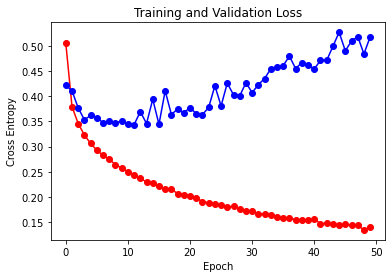

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-')
plt.plot(val_loss, 'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

Early Stopping Callback

In [20]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                patience = 10,
                                                verbose = 1)

Training using Early Stopping Callback

In [21]:
history = model.fit(train_ds, validation_data = test_ds, epochs = EPOCHS,
                   callbacks = [earlystopper])

Epoch 1/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1380 - accuracy: 0.9467 - val_loss: 0.5359 - val_accuracy: 0.8853
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1365 - accuracy: 0.9472 - val_loss: 0.5195 - val_accuracy: 0.8869
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1322 - accuracy: 0.9482 - val_loss: 0.5524 - val_accuracy: 0.8792
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1334 - accuracy: 0.9488 - val_loss: 0.5645 - val_accuracy: 0.8803
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1334 - accuracy: 0.9483 - val_loss: 0.5143 - val_accuracy: 0.8880
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1324 - accuracy: 0.9492 - val_loss: 0.5267 - val_accuracy: 0.8840
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1278 - accuracy: 0.9517 - val_loss: 0.5607 - val_accuracy:

Visualization using Matplotlib

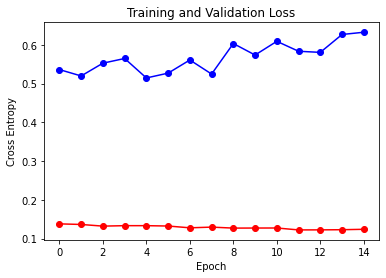

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-')
plt.plot(val_loss, 'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

Applying Dropout

In [23]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = tf.keras.layers.Flatten()                       # 28x28 = 784
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(64, activation='relu')
        self.dense4 = tf.keras.layers.Dense(128, activation='relu')
        self.dropout4 = tf.keras.layers.Dropout(0.5) # applying dropout
        self.dense5 = tf.keras.layers.Dense(10, activation='softmax')  # 10

    def call(self, x, training=False, mask=None):
        h = self.flatten(x)
        h = self.dense1(h)
        h = self.dense2(h)
        h = self.dense3(h)
        h = self.dense4(h)
        h = self.dropout4(h) # applying dropout
        return self.dense5(h)

Training

In [24]:
history = model.fit(train_ds, validation_data = test_ds, epochs = EPOCHS,
                   callbacks = [earlystopper])

Epoch 1/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1202 - accuracy: 0.9535 - val_loss: 0.5906 - val_accuracy: 0.8860
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1232 - accuracy: 0.9529 - val_loss: 0.6186 - val_accuracy: 0.8825
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1206 - accuracy: 0.9534 - val_loss: 0.6329 - val_accuracy: 0.8851
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1166 - accuracy: 0.9558 - val_loss: 0.6418 - val_accuracy: 0.8859
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1182 - accuracy: 0.9544 - val_loss: 0.5986 - val_accuracy: 0.8836
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1173 - accuracy: 0.9543 - val_loss: 0.6969 - val_accuracy: 0.8752
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1163 - accuracy: 0.9545 - val_loss: 0.6735 - val_accuracy:

Visualization using Matplotlib

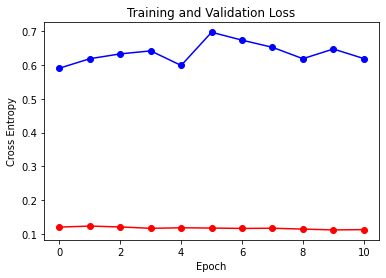

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-')
plt.plot(val_loss, 'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()